# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +61.56967293567                   -2.51    6.62s
  2   +55.49907885353        0.78       -1.39   9.25ms
  3   +38.85902054138        1.22       -1.01   49.6ms
  4   +27.40287324639        1.06       -0.85   12.6ms
  5   +17.62960716817        0.99       -0.71   10.7ms
  6   +11.29018242460        0.80       -0.76   8.96ms
  7   +9.290059075657        0.30       -0.73   7.20ms
  8   +8.050660176329        0.09       -0.56   8.80ms
  9   +7.203579294258       -0.07       -0.63   8.76ms
 10   +6.846350128799       -0.45       -0.74   25.9ms
 11   +6.507079651948       -0.47       -0.77   7.62ms
 12   +6.184753149909       -0.49       -0.71   7.54ms
 13   +5.863502942627       -0.49       -0.71   7.56ms
 14   +5.635896536509       -0.64       -0.73   7.35ms
 15   +5.473468810708       -0.79       -0.72   7.24ms
 16   +5.367130999798       -0.97       -0.73   9.36ms
 17   +5.23

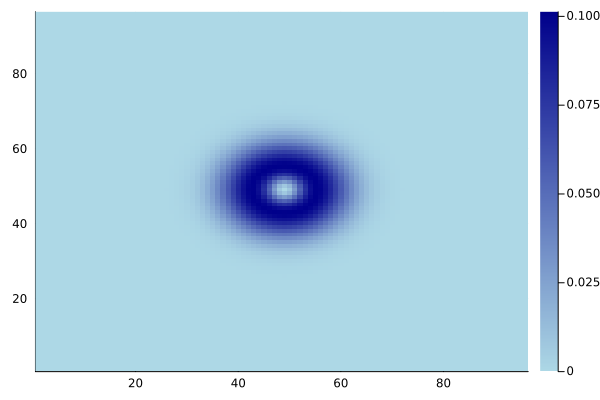

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)